In [108]:
import os.path
import datetime

import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from collections import OrderedDict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

%matplotlib inline

In [74]:
FMT = '%H:%M:%S,%f'

def srt_to_strs(f, interval_length):
    '''Convert a .srt file to a dict of strings'''
    
    # [(text, start_time, end_time)]
    intervals = []
    while True:
        _seq_no = f.readline().strip()
        if _seq_no == '': break
        start_str, end_str = f.readline().strip().split(' --> ')
        start_time = datetime.datetime.strptime(start_str, FMT)
        end_time = datetime.datetime.strptime(end_str, FMT)
        
        text_lines = []
        while True:
            text_line = f.readline().strip()
            if text_line == '': break
            text_line = text_line.replace('&#39;', '')
            text_line = text_line.replace('&gt;', '')
            text_lines.append(text_line)
            
        text = ' '.join(text_lines)
        intervals.append((text, start_time, end_time))
        
    _text, interval_start_time, _end_time = intervals[0]
    
    result = OrderedDict()
    lecture_name = os.path.basename(f.name)[:-4]
    interval_lines = []
    for idx, (text, start_time, end_time) in enumerate(intervals):
        
        interval_lines.append(text)
        
        if idx == len(intervals) - 1 or end_time - interval_start_time > interval_length:
            result[(lecture_name, interval_start_time, end_time)] = ' '.join(interval_lines)
            interval_start_time = end_time
            interval_lines = []
            
    return result

In [75]:
SRT_FILE_NAMES = [
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/01-01-introduction-redo-correction.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/01-02-structure-of-a-compiler-final.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/01-03-economy-of-Programming-Languages_19m51s_.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/02-01-cool-overview-final.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/02-02-cool-example-ii-final.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/02-03-cool-example-iii-final-correction.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/03-01-Lexical-Analysis-Part-1.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/03-02-lexical-analysis-examples-final.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/03-03-A+Regular+Languages.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/03-04-formal-languages.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/03-05-lexical-specifications-final-quizupdate.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/04+02+finite+automata+part+1.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/04-01-lexical-specification.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/04-03-regular-expressions-to-nfas-final-quizupdate-correction.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/04-04-nfa-to-dfa-quizupdate.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/04-05-implementing-finite-automata-correction.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/05-01-introduction-to-parsing.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/05-02-A+Context+Free+Grammars.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/05-03-Derivations-Part-1.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/05-04-A+Ambiguity.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/06-01-error-handling.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/06-02-abstract-syntax-trees.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/06-03-recursive-descent-parsing.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/06-04-1-recursive-descent-limitations-04-1.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/06-04-recursive-descent-algorithm.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/06-05-A+Left+Recursion.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/07-01-Predictive-Parsing-Part-1.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/07-02-first-sets.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/07-03-follow-sets.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/07-04-ll1-parsing-tables.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/07-05-Bottom-Up-Parsing-Part-1.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/07-06-Shift-Reduce-Parsing-Part-1.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/08-01-Handles-Part-1.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/08-02-recognizing-handles.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/08-03-recognizing-viable-prefixes.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/08-04-valid-items.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/08-05-slr-parsing.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/08-06-slr-parsing-example.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/08-07-slr-improvements.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/08-08-slr-examples-correction.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-01-introduction-to-semantic-analysis.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-02-scope.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-03-symbol-tables.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-04-types.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-05-A+Type+Checking.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-06-A+Type+Environments.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-07-A+Subtyping.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-08-A+Typing+Methods.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/09-09-implementing-type-checking.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/10-01-A+Static+vs.+Dynamic+Typing.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/10-02-self-type.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/10-03-A+Self+Type+Operations.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/10-04-self-type-usage.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/10-05-A+Self+Type+Checking.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/10-06-error-recovery.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/11-01-runtime-organization.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/11-02-A+Activations.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/11-03-activation-records.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/11-04-globals-and-heap.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/11-05-alignment.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/11-06-stack-machines.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/12-01-introduction-to-code-generation.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/12-02-A+Code+Generation+I.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/12-03-A+Code+Generation+II.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/12-04-code-generation-example.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/12-05-A+Temporaries.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/12-06-A+Object+Layout.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/13-01-semantics-overview.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/13-02-operational-semantics.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/13-03-cool-semantics-i.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/13-04-A+Cool+Semantics+II.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/14-01-intermediate-code.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/14-02-optimization-overview.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/14-03-local-optimization.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/14-04-peephole-optimization.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/15-02-constant-propagation.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/15-03-analysis-of-loops.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/15-04-orderings.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/15-05-A+Liveness+Analysis.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/16-01-register-allocation.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/16-02-A+Graph+Coloring.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/16-03-A+Spilling.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/16-04-managing-caches.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/17-01-automatic-memory-management.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/17-02-A+Mark+and+Sweep.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/17-03-A+Stop+and+Copy.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/17-04-conservative-collection.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/17-05-A+Reference+Counting.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/18-01-java.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/18-02-java-arrays.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/18-03-java-exceptions.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/18-04-java-interfaces.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/18-05-java-coercions.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/18-06-java-threads.srt",
    "/Users/andrewlamb/Google_Drive/Stanford/CS199/CompilersSelfPacedCS1/18-07-other-topics.srt",
]

documents = OrderedDict()
for name in SRT_FILE_NAMES:
    with open(name) as f:
        documents.update(srt_to_strs(f, datetime.timedelta(minutes=1)))

In [92]:
# http://www.ranks.nl/stopwords default list
with open('ranks_nl_stop_words_long.txt') as f:
    stop_words = [line.strip() for line in f]
# A few added stop words
stop_words.extend(['alright', 'going'])
# A few removed stop words
stop_words.remove('first')

tfidf = TfidfVectorizer(
    stop_words=stop_words,
    ngram_range=(1,2),
    min_df=2
)
X = tfidf.fit_transform(documents.values())

In [93]:
inverse_voc = {v: k for k, v in tfidf.vocabulary_.items()}
most_common_terms = {}

for idx, key in enumerate(documents.keys()):
    row = X[idx,:].toarray().flatten()
    max_indices = row.argsort()[-5:]
    most_common_terms[key] = [inverse_voc[voc_idx] for voc_idx in max_indices]

for key, terms in sorted(
    most_common_terms.items(), 
    key=lambda ((lecture_name, start_time, _end_time), term): (lecture_name, start_time)
):
    lecture_name, start_time, end_time = key
    print '{}, {} --> {}'.format(
        lecture_name, start_time.strftime(FMT), end_time.strftime(FMT)
    )
    pprint(terms)
    print

01-01-introduction-redo-correction, 00:00:03,310000 --> 00:01:06,470000
[u'program',
 u'compilers',
 u'interpreters',
 u'compilers interpreters',
 u'interpreter']

01-01-introduction-redo-correction, 00:01:06,470000 --> 00:02:10,369000
[u'meaning', u'running', u'program', u'executable', u'compiler']

01-01-introduction-redo-correction, 00:02:10,369000 --> 00:03:12,340000
[u'processing', u'costs', u'executable', u'704', u'hardware']

01-01-introduction-redo-correction, 00:03:12,340000 --> 00:04:14,890000
[u'coding', u'speed coding', u'productive', u'programs', u'speed']

01-01-introduction-redo-correction, 00:04:14,890000 --> 00:05:18,190000
[u'form machine', u'speed coding', u'speed', u'formulas', u'thought']

01-01-introduction-redo-correction, 00:05:18,190000 --> 00:06:23,430000
[u'today', u'thought', u'percent', u'project', u'fortran']

01-01-introduction-redo-correction, 00:06:23,430000 --> 00:07:27,669000
[u'computer', u'science', u'theory', u'computer science', u'fortran']

01-01

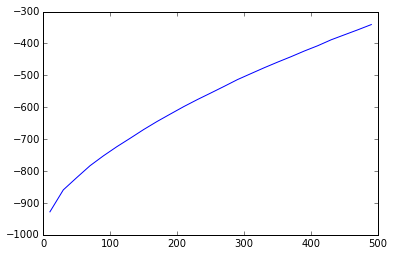

In [120]:
n_clusters = range(10, 500, 20)
scores = []

for val in n_clusters:
    kmeans = KMeans(n_clusters=val)
    kmeans.fit(X)
    scores.append(kmeans.score(X))
    
plt.plot(n_clusters, scores)

In [124]:
kmeans = KMeans(n_clusters=100)
clusters = kmeans.fit_predict(X)

In [170]:
cluster_assignments = {}
for idx, cluster_assignment in enumerate(clusters):
    if cluster_assignment not in cluster_assignments:
        cluster_assignments[cluster_assignment] = [documents.keys()[idx]]
    else:
        cluster_assignments[cluster_assignment].append(documents.keys()[idx])

new_assignments = {}
        
for idx, keys in cluster_assignments.items():
    new_keys = sorted(keys, key=lambda (lecture_name, start_time, _end_time): (lecture_name, start_time))
    keywords = []
    document_idxs = [documents.keys().index(key) for key in new_keys]
    max_indices = X[document_idxs, :].toarray().argsort()[:, -10:]
    
    for indices in max_indices:
        keywords.append([inverse_voc[voc_idx] for voc_idx in indices])
    
    new_keys = [
        '{}'.format(lecture_name, start_time.strftime(FMT), end_time.strftime(FMT)) 
        for lecture_name, start_time, end_time in new_keys
    ]
    new_assignments[idx] = zip(new_keys, keywords)

for cluster in new_assignments.values():
    pprint(cluster)
    print

[('09-07-A+Subtyping',
  [u'tree',
   u'prime',
   u'inheritance',
   u'bigger',
   u'smallest',
   u'bound types',
   u'bound upper',
   u'bound',
   u'upper bound',
   u'upper']),
 ('09-07-A+Subtyping',
  [u'common ancestor',
   u'object find',
   u'type walk',
   u'find',
   u'bound',
   u'upper',
   u'types',
   u'upper bound',
   u'tree',
   u'bound types']),
 ('10-03-A+Self+Type+Operations',
  [u'cant allow',
   u'inheritance relationships',
   u'bit differently',
   u'relationship doesnt',
   u'cant',
   u'true',
   u'case',
   u'allow',
   u'subclass',
   u'hierarchy']),
 ('10-03-A+Self+Type+Operations',
  [u'unrelated',
   u'modify program',
   u'relationship doesnt',
   u'fragile',
   u'classes',
   u'doesnt',
   u'hierarchy',
   u'leaf',
   u'inheritance',
   u'subtype']),
 ('15-04-orderings',
  [u'equal',
   u'element',
   u'top',
   u'ordering',
   u'bigger upper',
   u'bigger',
   u'smallest',
   u'bound',
   u'upper',
   u'upper bound']),
 ('15-04-orderings',
  [u'equal'